In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_recall_fscore_support

pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv("./Hotel_Bookings/hotel_bookings.csv")

## PART 1: EDA

First, we clean the data, looking for fields that are null and if we can set them to a different value. We also looked at all the categorical variables to see if there were any values that didn't seem formatted correctly, such as a misspelled month name.

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The **agent** and **company** features are ids. If they are null, we assumed that this means the booking was made without one. So, we set these to 0.

Similarly, for **children**, we set null values of children to 0.0 instead.

For **country**, we decided to drop the data points that were null.

In [6]:
df = df.fillna({"agent":0,"company":0, "children":0.0})
df.dropna(subset=["country"], inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [9]:
df.is_canceled.unique() # should only have 0 or 1 valeus for true and false

array([0, 1], dtype=int64)

In [10]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [11]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [13]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [15]:
df.is_repeated_guest .unique() # should only have 0 or 1 valeus for true and false

array([0, 1], dtype=int64)

In [16]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [17]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [18]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [19]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [20]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

There were 5 data points with the Undefined value for the **distribution_channel** feature.

Similarly, there were 2 data points with the Undefined value for the **market_segment** feature.

For both of these features, we dropped those data points.

In [21]:
df.distribution_channel.value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

TA means "Travel Agents".  
TO means "Tour Opperators"
Direct means that the person directly booked the hotel.  
Corporate means a corporate entity booked the hotel.  
GDS means "Global Distribution System" - computerized network that facilitates transactions between travel service providers and travel agents.  

In [22]:
df.market_segment.value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [23]:
df.drop(df[df.distribution_channel == "Undefined"].index, inplace=True)
df.drop(df[df.market_segment == "Undefined"].index, inplace=True)
df.distribution_channel.value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Name: distribution_channel, dtype: int64

In [24]:
df.market_segment.value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12447
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

For the **meal** feature, there were quite a few Undefined, but the data description says that Undefined and SC both mean no meal package, so we replaced all the Undefined values with SC.

In [25]:
df.meal.value_counts()

BB           91863
HB           14433
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [26]:
df.meal.replace({"Undefined":"SC"}, inplace=True)
df.meal.value_counts()

BB    91863
HB    14433
SC    11803
FB      798
Name: meal, dtype: int64

As for the **reservation_status** feature, this is extremely similar to the **is_canceled** feature, so we decided to drop one of them.

We decided to drop **reservation_status** because it is closely related to **is_canceled** and is not necessary. In **reservation_status**, no shows are labeled as canceled in **is_canceled** with a value of 1. **is_canceled** is our models' target feature.

We also decided to drop **reservation_status_date** because we cannot utilize this feature to analyze the date in our model. This is due to the fact that we do not have the original reservation date to compare the **reservation_status_date** to. Knowing the **reservation_status_date** alone is not enough to make analysis from.

The data set labels no shows (resevation status) as is canceled.

In [27]:
df[df.reservation_status == "No-Show"].is_canceled.unique()

array([1], dtype=int64)

In [28]:
df = df.drop(columns=["reservation_status", "reservation_status_date"])

We changed the **arrival_date_month** to ordinal number values.  
We changed the **meal** to ordinal values ranked based on increasing values with more included meals.  
We changed the **deposit_type** to ordinal values ranked based on increasing values with more financial attachment.  

In [29]:
# change month
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April': 4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

# meal ranking
df['meal'] = df['meal'].map({'SC':0, 'BB':1, 'HB':2, 'FB': 3})

# deposit type ranking
df['deposit_type'] = df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

The documentaion for the data set indicates the **children** column as a Integer type. However in the actual data set, we found that **children** data type is float64. We changed the **children** data type from float64 to int64 because there cannot be a fraction of a child.

In [30]:
df.children.dtypes

dtype('float64')

In [31]:
df['children'] = df.children.astype('int64')

In [32]:
df.children.dtypes

dtype('int64')

We combined the total number of people into a new column called **group_size**. This column adds the number of babies, adults and children.

In [33]:
# Can combine family into one
df['group_size'] = df['babies'] + df['adults'] + df['children']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,group_size
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,1,PRT,Direct,Direct,0,0,0,C,C,3,0,0.0,0.0,0,Transient,0.0,0,0,2
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,1,PRT,Direct,Direct,0,0,0,C,C,4,0,0.0,0.0,0,Transient,0.0,0,0,2
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,1,GBR,Direct,Direct,0,0,0,A,C,0,0,0.0,0.0,0,Transient,75.0,0,0,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,1,GBR,Corporate,Corporate,0,0,0,A,A,0,0,304.0,0.0,0,Transient,75.0,0,0,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,1,GBR,Online TA,TA/TO,0,0,0,A,A,0,0,240.0,0.0,0,Transient,98.0,0,1,2


We decided to check for a possible error - having a group size of 0 would mean that there would be no people staying at the hotel.

In [34]:
df[df.group_size == 0].shape[0]

170

We decided to remove rows with a group size of 0 because we thought it might be an error to have no guests booking a hotel.

In [35]:
df.drop(df[df.group_size == 0].index, inplace=True)
df[df.group_size == 0].shape[0]

0

We decided to make a new column indicating whether a booking's assigned room type changed from their reserved room type. We feel that it may be more likely for someone to cancel their booking if their room changed from what they wanted. We added a new column called **room_changed** that checks to see if a booking's **reserved_room_type** equals its **assigned_room_tye**. The feature **room_changed** has either a 0 and 1 value. 0 indicates that the room did not change and 1 indicates that the room did change. We think this will be a useful feature for us to analyze.

In [36]:
df['room_changed'] = df['reserved_room_type'] == df['assigned_room_type']
df['room_changed'] = df['room_changed'].map({False:0, True:1})

Next, we split the data. We don't want to see the testing data before our model is built, so we will do this before doing any data analysis.

Our data has over 100,000 entries.  
We split the data into :
- **75%** : training data
- **25%** : testing data

In [37]:
df_x = df.copy()
df_x = df_x.drop(columns=["is_canceled"]) # everything except what we need to predict
df_y = df.copy()
df_y = df_y.is_canceled
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=42)

### Question 1: Which country saw the most hotel bookings according to the data?

We decided to make a pie chart with the number of bookings per country. Since there were so many countries, we decided to limit the chart to the top 10 countries by most number of bookings and combine the rest of them into one slice called "others". Using this, we found that the country with the most listings is **Portugal**.

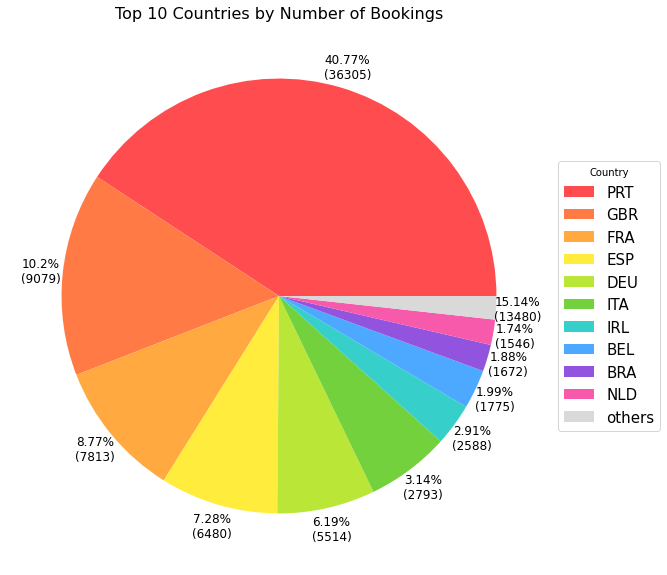

In [38]:
country_sort = train_x.country.value_counts().sort_values(ascending=False)
top10_countries = country_sort[:10].copy()
other_countries = pd.Series(data = {"others":country_sort[10:].sum()}, index=["others"])
top_countries = top10_countries.append(other_countries)

num_bookings = top_countries.values
total = num_bookings.sum()
country_labels = map(lambda n: str(round((n/total)*100,2)) + "%\n(" + str(n) + ")",num_bookings)

plot = top_countries.sort_values(ascending=False).plot.pie(figsize=(10, 10), labels=country_labels, colors=["#ff4d4f", "#ff7a45", "#ffa940", "#ffec3d", "#bae637", "#73d13d", "#36cfc9", "#4da9ff", "#9254de", "#f759ab", "#d9d9d9"]).set_title("Top 10 Countries by Number of Bookings",size=16)
plot.axes.set_ylabel("")
for t in plot.axes.texts:
    t.set_horizontalalignment('center')
    t.set_size(12)
plot.axes.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=top_countries.index, title="Country", prop={"size":15})

### Question 2: What is the distribution like for both hotels with respect to price of a room per night?

We chose to use a box plot to show the distributions and decided to split it by **room_type**. There were one data point that was an outlier with an extreme adr value of around 5000 and we removed it so that the box plots would be reasonably scaled.

On average, the City Hotel is pricier for each room type. Generally, the spread of prices for the Resort Hotel is larger than the City Hotel.

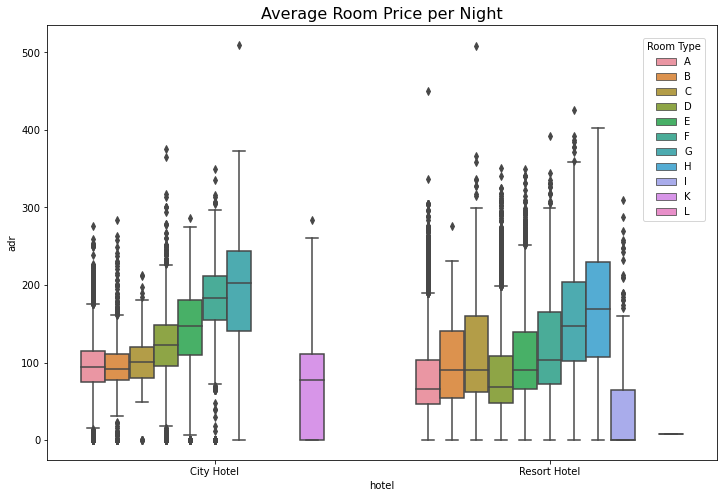

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x="hotel", y="adr", hue="assigned_room_type", data=train_x[train_x.adr < 1000].sort_values(by="assigned_room_type")).set_title("Average Room Price per Night", size=16)
plt.legend(bbox_to_anchor=(0.89, 0.97), loc=2, borderaxespad=0., title="Room Type")

### Question 3: Which months are the most busy for both hotels? 

We used a count plot to display the bookings per month and split it by the hotel the booking was for.

The months that are the most busy for both hotels seems to be May, July, August. August has the most for both hotels. The least popular months are November, December, January.

There are more bookings for the City Hotel than the Resort Hotel.

### Which months see the most expensive per night costs?

We made a bar plot of the mean ADR for each month and separated the data based on hotel.

For the Resort Hotel, June, July, August have a greater average per night cost than other months, August being the greatest. The average per night cost is the lowest during November. For the City Hotel, each month has similar average per night costs. The Resort Hotel has a larger range of average prices than the City Hotel.

Text(0.5, 1.0, 'Bookings per Month')

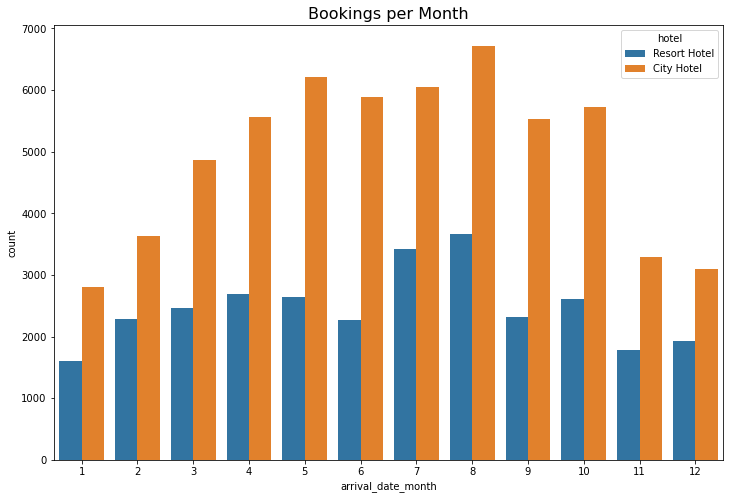

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x="arrival_date_month", hue="hotel", data=train_x).set_title("Bookings per Month", size=16)

Text(0.5, 1.0, 'ADR per Month')

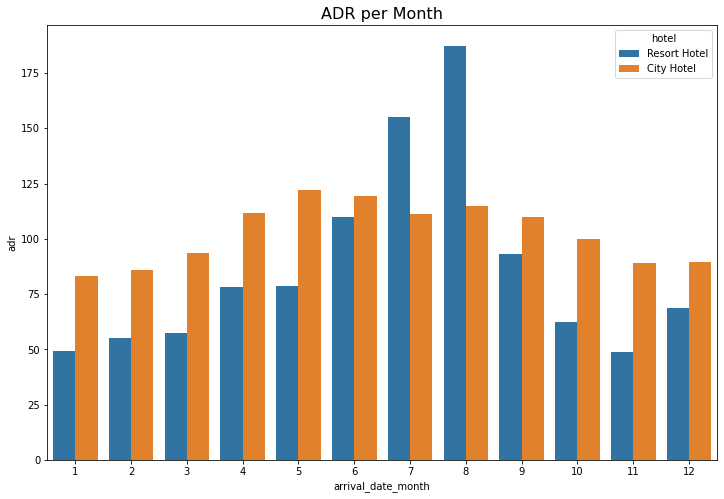

In [41]:
plt.figure(figsize=(12,8))
Resort_adr_mean = train_x[train_x.hotel == "Resort Hotel"].groupby(by=["arrival_date_month"]).adr.mean()
Resort_adr_mean = Resort_adr_mean.reset_index()
Resort_adr_mean["hotel"] = "Resort Hotel"

City_adr_mean = train_x[train_x.hotel == "City Hotel"].groupby(by=["arrival_date_month"]).adr.mean()
City_adr_mean = City_adr_mean.reset_index()
City_adr_mean["hotel"] = "City Hotel"

frames = [Resort_adr_mean, City_adr_mean]

result = pd.concat(frames, ignore_index=True)
sns.barplot(x="arrival_date_month", y="adr", hue="hotel", data=result).set_title("ADR per Month", size=16)

### Question 4: Which months see the most cancellations for both hotels?

We used a count plot to display the cancellations per month and split it by the hotel the booking was for.

For the City Hotel, April, May, June, August have more cancellations than other months. The months of November, January have the lowest number of cancellations per month. The shape of the cancellations per month is similar to bookings per month.

For the Resort Hotel, July, August have more cancellations than other months. The shape of the cancellations per month is similar to bookings per month.

The City Hotel has more cancellations per month than the Resort Hotel. However, the City Hotel has more total hotel bookings per month.

Text(0.5, 1.0, 'Cancellations per Month')

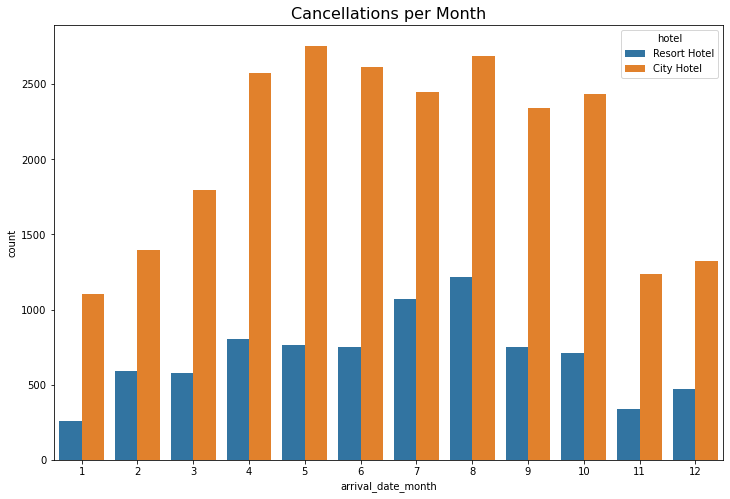

In [42]:
train = pd.concat([train_x, train_y], axis=1)
plt.figure(figsize=(12,8))
sns.countplot(x="arrival_date_month", hue="hotel", data=train[train.is_canceled == 1]).set_title("Cancellations per Month", size=16)

### Question 5: Examine distributions of bookings vs market segment.

We used a count plot to display the cancellations per month and split it by the hotel the booking was for.


Text(0.5, 1.0, 'Bookings per Market Segment')

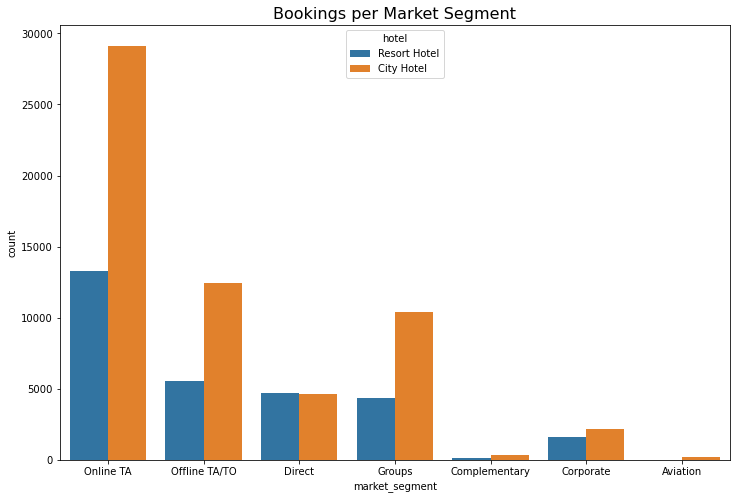

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x="market_segment", hue="hotel", data=train_x).set_title("Bookings per Market Segment", size=16)

### Question 6: Which room type was most commonly booked?

We decided to use a pie chart to highlight the differences between the top 5 most commonly booked rooms. We grouped the rest of the room types under "others".

Room Type A has the most bookings and by a large margin compared to the rest of the room types. Room Type A makes up over half of the number of bookings. Room type D has the second largest amount of bookings. The remaining top room types, E, F, and G, make up around the same percentage of bookings.


### Most commonly cancelled?

We also decided to use a pie chart for the top 5 most canceled rooms. We grouped the rest of the room types under "others".

Room Type A is the most canceled room type. Room Type A makes up around 3/4 of the cancellations. Similarly to the most commonly booked, room types D, E, F, and G are the rest of the most canceled rooms. Room type D number of cancellations also is significantly greater than remaining top canceled room types, E, F, and G.



We noticed that the answer to both these questions were the same rooms in the same order, even though the percentages were not exactly the same.

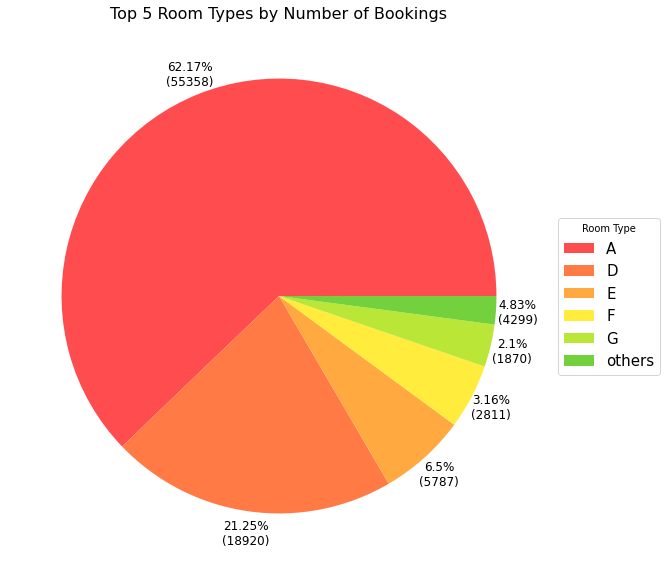

In [44]:
room_sort = train_x.assigned_room_type.value_counts().sort_values(ascending=False)
top5_rooms = room_sort[:5].copy()
other_rooms = pd.Series(data = {"others":room_sort[5:].sum()}, index=["others"])
top_rooms = top5_rooms.append(other_rooms)

num_bookings = top_rooms.values
total = num_bookings.sum()
room_labels = map(lambda n: str(round((n/total)*100,2)) + "%\n(" + str(n) + ")",num_bookings)

plot = top_rooms.sort_values(ascending=False).plot.pie(figsize=(10, 10), labels=room_labels, colors=["#ff4d4f", "#ff7a45", "#ffa940", "#ffec3d", "#bae637", "#73d13d", "#36cfc9", "#4da9ff", "#9254de", "#f759ab", "#d9d9d9"]).set_title("Top 5 Room Types by Number of Bookings",size=16)
plot.axes.set_ylabel("")
for t in plot.axes.texts:
    t.set_horizontalalignment('center')
    t.set_size(12)
plot.axes.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=top_rooms.index, title="Room Type", prop={"size":15})

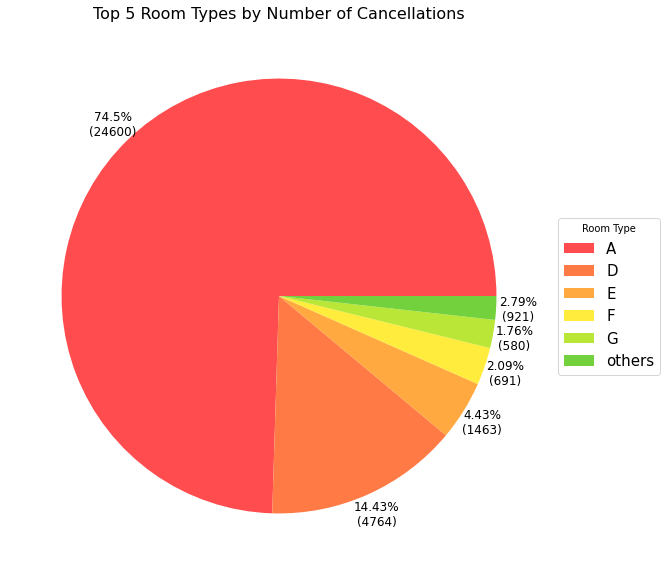

In [45]:
#train = pd.concat([train_x, train_y], axis=1)
canceled = train[train.is_canceled ==1]
room_sort = canceled.assigned_room_type.value_counts().sort_values(ascending=False)
top5_rooms = room_sort[:5].copy()
other_rooms = pd.Series(data = {"others":room_sort[5:].sum()}, index=["others"])
top_rooms = top5_rooms.append(other_rooms)

num_bookings = top_rooms.values
total = num_bookings.sum()
room_labels = map(lambda n: str(round((n/total)*100,2)) + "%\n(" + str(n) + ")",num_bookings)

plot = top_rooms.sort_values(ascending=False).plot.pie(figsize=(10, 10), labels=room_labels, colors=["#ff4d4f", "#ff7a45", "#ffa940", "#ffec3d", "#bae637", "#73d13d", "#36cfc9", "#4da9ff", "#9254de", "#f759ab", "#d9d9d9"]).set_title("Top 5 Room Types by Number of Cancellations",size=16)
plot.axes.set_ylabel("")
for t in plot.axes.texts:
    t.set_horizontalalignment('center')
    t.set_size(12)
plot.axes.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=top_rooms.index, title="Room Type", prop={"size":15})

### Question 7: What percentage of the data recorded cancellations for each hotel?

We made pie charts for the bookings of both hotels and had 2 wedges in each, one for canceled bookings and the other for the rest.

For the resort hotel, 27.97% of the bookings were canceled. For the city hotel, 41.63% of the bookings were canceled, which is much higher than the resort hotel's percentage.

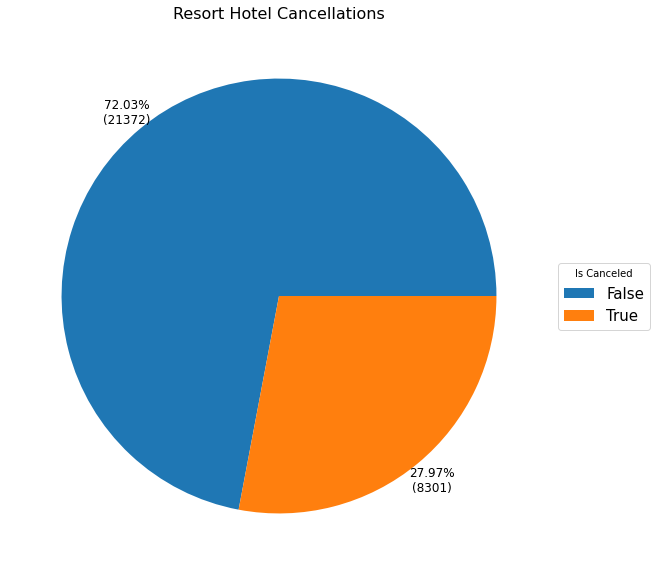

In [46]:
#train = pd.concat([train_x, train_y], axis=1)
Resort_hotel = train[train.hotel == "Resort Hotel"]
cancellations_Resort_sort = Resort_hotel.is_canceled.value_counts()

num_cancels_Resort = cancellations_Resort_sort.values

total_Resort = num_cancels_Resort.sum()

resort_labels = map(lambda n: str(round((n/total_Resort)*100,2)) + "%\n(" + str(n) + ")",num_cancels_Resort)

plot = cancellations_Resort_sort.sort_values(ascending=False).plot.pie(figsize=(10, 10), labels=resort_labels).set_title("Resort Hotel Cancellations",size=16)
plot.axes.set_ylabel("")
for t in plot.axes.texts:
    t.set_horizontalalignment('center')
    t.set_size(12)
plot.axes.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=['False', 'True'], title="Is Canceled", prop={"size":15})

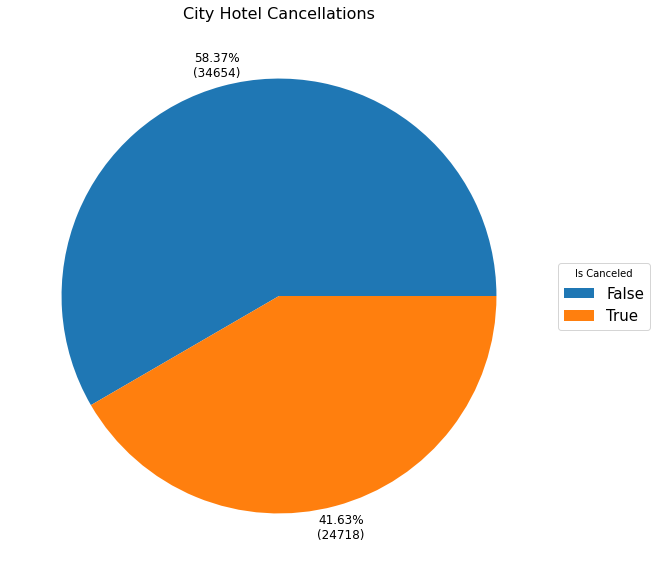

In [47]:
#train = pd.concat([train_x, train_y], axis=1)
City_hotel = train[train.hotel == "City Hotel"]
cancellations_City_sort = City_hotel.is_canceled.value_counts()

num_cancels_City = cancellations_City_sort.values

total_City = num_cancels_City.sum()

city_labels = map(lambda n: str(round((n/total_City)*100,2)) + "%\n(" + str(n) + ")",num_cancels_City)

plot = cancellations_City_sort.sort_values(ascending=False).plot.pie(figsize=(10, 10), labels=city_labels).set_title("City Hotel Cancellations",size=16)
plot.axes.set_ylabel("")
for t in plot.axes.texts:
    t.set_horizontalalignment('center')
    t.set_size(12)
plot.axes.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=['False', 'True'], title="Is Canceled", prop={"size":15})

### Spearman Correlation Heatmap

We decided to make a heatmap with the data to see which features were most correlated to our data. We thought this would help us cut down the number of features when building our model since this dataset had so many different features.

Since some features were not easily mappable, we decided to drop them for the heatmap. Those features were:
- country
- market_segment
- distribution_channel
- reserved_room_type
- assigned_room_type
- customer_type

We also used Spearman correlation since Pearson works only for linear data, which some of this data might not be, and since Pearson is more influenced by outliers, which we believed this big a dataset would most likely have.

We decided to pick the features that had an absolute value of correlation with **is_canceled** as 0.1 or higher, since this dataset is quite large. These features are:

- hotel
- lead_time
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- deposit_type
- days_in_waiting_list
- required_car_parking_spaces
- total_of_special_requests
- room_changed

In [48]:
train.groupby('assigned_room_type').adr.mean().sort_values(ascending=False)

assigned_room_type
H    172.775353
G    166.922791
F    151.625799
E    118.610681
C    113.067095
D    108.022244
B     94.944776
A     93.423630
K     70.806765
I     42.186097
L      8.000000
Name: adr, dtype: float64

hotel
City Hotel      59372
Resort Hotel    29673
dtype: int64

[Text(0.5, 1.0, 'Spearman Correlation Heat Map')]

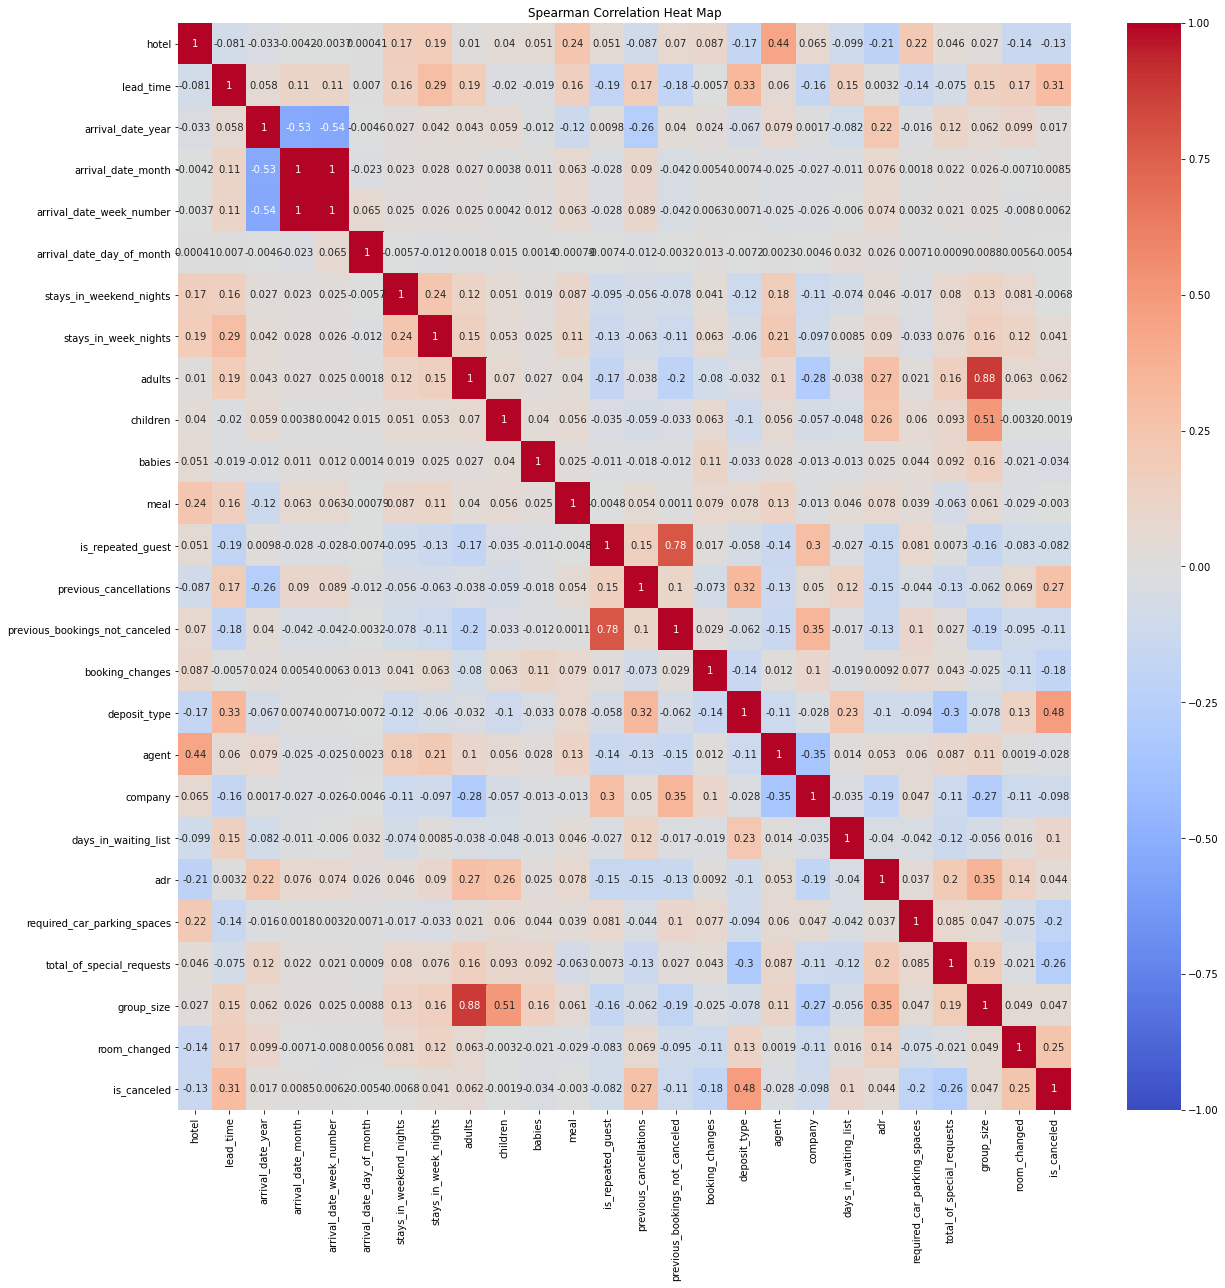

In [49]:
plt.figure(figsize=(20, 20))

corr_data = train.copy()
display(corr_data.groupby('hotel').size().nlargest())
corr_data['hotel'] = corr_data['hotel'].map({'City Hotel':1, 'Resort Hotel':2})

corr_data = corr_data.drop(columns=["country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "customer_type"])

corr_matrix = corr_data.corr(method="spearman")
sns.heatmap(data = corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1).set(title="Spearman Correlation Heat Map")

We decided to make another heatmap with just the correlated features mentioned above. If two of those features are correlated with each other, we would pick one to drop before we build our models.

Nothing seems to be highly correlated so we decided to keep these features.

<AxesSubplot:>

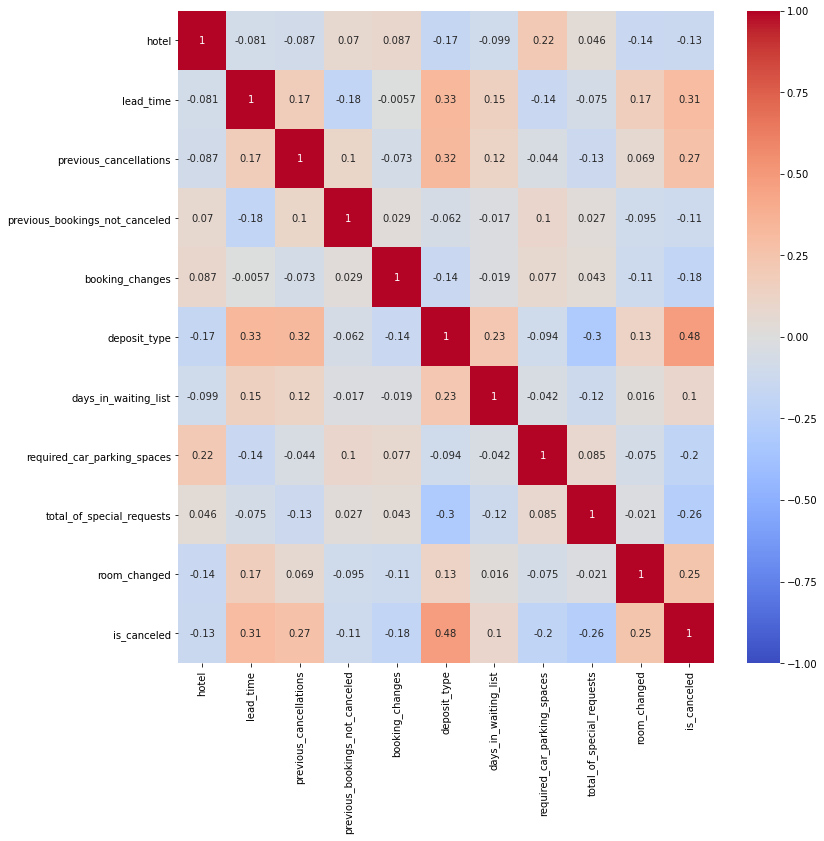

In [50]:
corr_model_features = corr_data[["hotel", "lead_time", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "deposit_type", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests", "room_changed", "is_canceled"]]
corr_model_matrix = corr_model_features.corr(method="spearman")

plt.figure(figsize=(12, 12))
sns.heatmap(data = corr_model_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

## PART 2: Modeling

For all our models, we decided to limit the data to only the features that we listed above when making the correlation heatmaps. We chose 3 models that would perform binary classification. So in this case, we would not use something like linear regression.

For our cross-validation, we decided to use 10 folds instead of 5 because our data size is quite large (over 100k).

### Model 1: Logistic Regression

For our first model, we decided to use Logistic Regression. Without cross-validation, the model had an f-score of around 0.702. With cross-validation, the average f-score across a 10-fold cross-validation was 0.700. These models performed similarly. Their precisions and accuracies were also similar values. In this case, cross-validation did not improve the model significantly. 

In [51]:
from sklearn.linear_model import LogisticRegression

model_train_x = train_x.copy()
model_test_x = test_x.copy()

model_train_x['hotel'] = model_train_x['hotel'].map({'City Hotel':1, 'Resort Hotel':2})
model_test_x['hotel'] = model_test_x['hotel'].map({'City Hotel':1, 'Resort Hotel':2})

model_train_x = model_train_x[["hotel", "lead_time", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "deposit_type", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests", "room_changed"]]
model_test_x = model_test_x[["hotel", "lead_time", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "deposit_type", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests", "room_changed"]]

# scale data
scaler = preprocessing.StandardScaler().fit(model_train_x)
scale_train_x = scaler.transform(model_train_x)
scale_test_x = scaler.transform(model_test_x)

model = LogisticRegression()
model.fit(scale_train_x, train_y)

predictions = model.predict(scale_test_x)

# print('Logistic Regression F1 score: %.2f' %f1_score(predictions, test_y))

In [52]:
info = precision_recall_fscore_support(test_y, predictions, average='macro')
print('LogisticRegression precision, recall, F-score:', info[:-1])

LogisticRegression precision, recall, F-score: (0.8253840671497733, 0.6930577057352793, 0.7017558867053815)


In [53]:
clf = LogisticRegression()

# K folds
cv = cross_validate(clf, scale_train_x, train_y, cv=10, scoring=('precision_macro', 'recall_macro', 'f1_macro'))
precision_scores = cv.get('test_precision_macro')
recall_scores = cv.get('test_recall_macro')
f1_scores = cv.get('test_f1_macro')

print('LogisticRegression CV\nprecision:', precision_scores, '\nrecall:', recall_scores, '\nF-score:', f1_scores)
print()

info = [precision_scores.mean(), recall_scores.mean(), f1_scores.mean()]
print('LogisticRegression CV average precision, recall, F-score:', info)

LogisticRegression CV
precision: [0.83784575 0.8219903  0.82782758 0.82918974 0.82236603 0.82787293
 0.82615799 0.82706858 0.81142682 0.81967068] 
recall: [0.70164394 0.68834012 0.6918608  0.69732012 0.69116306 0.68903595
 0.68919549 0.69699625 0.67891962 0.68668038] 
F-score: [0.71289405 0.69698891 0.70118954 0.70777696 0.70042665 0.69774671
 0.69794771 0.70739767 0.68558229 0.6949889 ]

LogisticRegression CV average precision, recall, F-score: [0.8251416407300812, 0.6911155721431665, 0.7002939380545639]


### Model 2: DecisionTreeClassifier

For our second model, we decided to use the Decision Tree Classifier. Without cross-validation, the model had an f-score of around 0.760. With cross-validation, the average f-score across a 10-fold cross-validation was around 0.756. These models performed similarly. Their precisions and accuracies were also similar values. In this case, cross-validation did not improve the model significantly. 

In [54]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(scale_train_x, train_y)

predictions = model.predict(scale_test_x)

In [55]:
info = precision_recall_fscore_support(test_y, predictions, average='macro')
print('DecisionTreeClassifier precision, recall, F-score:', info[:-1])

DecisionTreeClassifier precision, recall, F-score: (0.7839827503856787, 0.7504612225239273, 0.760248667755153)


In [56]:
clf = DecisionTreeClassifier()

cv = cross_validate(clf, scale_train_x, train_y, cv=10, scoring=('precision_macro', 'recall_macro', 'f1_macro'))
precision_scores = cv.get('test_precision_macro')
recall_scores = cv.get('test_recall_macro')
f1_scores = cv.get('test_f1_macro')

print('DecisionTreeClassifier CV\nprecision:', precision_scores, '\nrecall:', recall_scores, '\nF-score:', f1_scores)
print()

info = [precision_scores.mean(), recall_scores.mean(), f1_scores.mean()]
print('DecisionTreeClassifier CV average precision, recall, F-score:', info)

DecisionTreeClassifier CV
precision: [0.78362572 0.78075784 0.77904289 0.78296865 0.77359793 0.78674366
 0.78217721 0.78678916 0.77175323 0.77733983] 
recall: [0.74749256 0.74597551 0.7464621  0.748666   0.74082149 0.74820985
 0.74814832 0.750496   0.73422537 0.74479484] 
F-score: [0.75787871 0.75607558 0.7561794  0.75876613 0.75040189 0.75903214
 0.75818019 0.76100789 0.74434929 0.7544533 ]

DecisionTreeClassifier CV average precision, recall, F-score: [0.7804796120778138, 0.7455292049463749, 0.7556324517131595]


### Model 3: KNeighbors

For our third model, we decided to use K Neighbors. Without cross-validation, the model had an f-score of around 0.752. With cross-validation, the average f-score across a 10-fold cross-validation was around 0.745. These models performed similarly. Their precisions and accuracies were also similar values. In this case, cross-validation did not improve the model significantly. 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(scale_train_x, train_y)

predictions = model.predict(scale_test_x)

In [58]:
info = precision_recall_fscore_support(test_y, predictions, average='macro')
print('KNeighborsClassifier precision, recall, F-score:', info[:-1])

KNeighborsClassifier precision, recall, F-score: (0.7673813121093715, 0.7441492099516847, 0.7517432681000484)


In [59]:
clf = KNeighborsClassifier()

cv = cross_validate(clf, scale_train_x, train_y, cv=10, scoring=('precision_macro', 'recall_macro', 'f1_macro'))
precision_scores = cv.get('test_precision_macro')
recall_scores = cv.get('test_recall_macro')
f1_scores = cv.get('test_f1_macro')

print('KNeighborsClassifier CV\nprecision:', precision_scores, '\nrecall:', recall_scores, '\nF-score:', f1_scores)
print()

info = [precision_scores.mean(), recall_scores.mean(), f1_scores.mean()]
print('KNeighborsClassifier CV average precision, recall, F-score:', info)

KNeighborsClassifier CV
precision: [0.76013056 0.75612636 0.76348176 0.76279143 0.76186504 0.75932529
 0.7641771  0.75610561 0.75265396 0.75521155] 
recall: [0.74149921 0.73370916 0.74287572 0.74061526 0.74081798 0.73742731
 0.74371023 0.7381254  0.7295546  0.73316168] 
F-score: [0.74808345 0.74106187 0.7499731  0.74804566 0.74798735 0.74473738
 0.7507857  0.74449469 0.73696688 0.7404207 ]

KNeighborsClassifier CV average precision, recall, F-score: [0.7591868651099356, 0.7381496555697789, 0.7452556791343127]


### Team Members Contributions
Karen Huang: Cleaned data, EDA (Question 1,2,3 and heatmaps), Modeling

Andrea Lee: Cleaned data, EDA (Question 1,4,6,7)

Cynthia Lee: EDA (Question 2,3,4,5), Modeling